In [1]:
import pandas as pd
import yaml

pd.set_option('display.max_columns', None)

with open('../../Settings.yaml', 'r') as file:
    Setting = yaml.safe_load(file)

In [2]:
file_path_PPI = f"{Setting['PPI']}"
PPI = pd.read_excel(file_path_PPI)
PPI = PPI[PPI['Industry_Category_Code']==1]
PPI.drop(columns=['Industry_Category_Code','Industry_Code','Industry_Name'], inplace = True)

In [3]:
file_path_Workshop_Statistic = f"{Setting['Workshop_Statistic']}" 
Workshop_Statistic = pd.read_excel(file_path_Workshop_Statistic)
Workshop_Statistic = Workshop_Statistic[Workshop_Statistic['Industry_Category_Code']==1]
Workshop_Statistic = Workshop_Statistic[['Year','Wage_Value','Total_Output_Industrial_Activity_Value','Capital_Formation.Fixed.Value']]

In [4]:
file_path_Workshop_Input = f"{Setting['Workshop_Input']}" 
Workshop_Input = pd.read_excel(file_path_Workshop_Input)
Workshop_Input = Workshop_Input[Workshop_Input['Industry_Category_Code']==1]
Workshop_Input = Workshop_Input[['Year','Input_Value_Water','Input_Value_Electricity','Input_Value_Fuel','Input_Value_without_Energy.Raw.Material']]


In [5]:
Dataset = pd.merge(PPI, Workshop_Statistic, on='Year', how='left')
Dataset = pd.merge(Dataset, Workshop_Input, on='Year', how='left')
Dataset.dropna(subset='Wage_Value',inplace = True)

for col in Dataset.columns[2:]:
    Dataset[col] = (Dataset[col] / Dataset[Dataset.columns[1]]) 



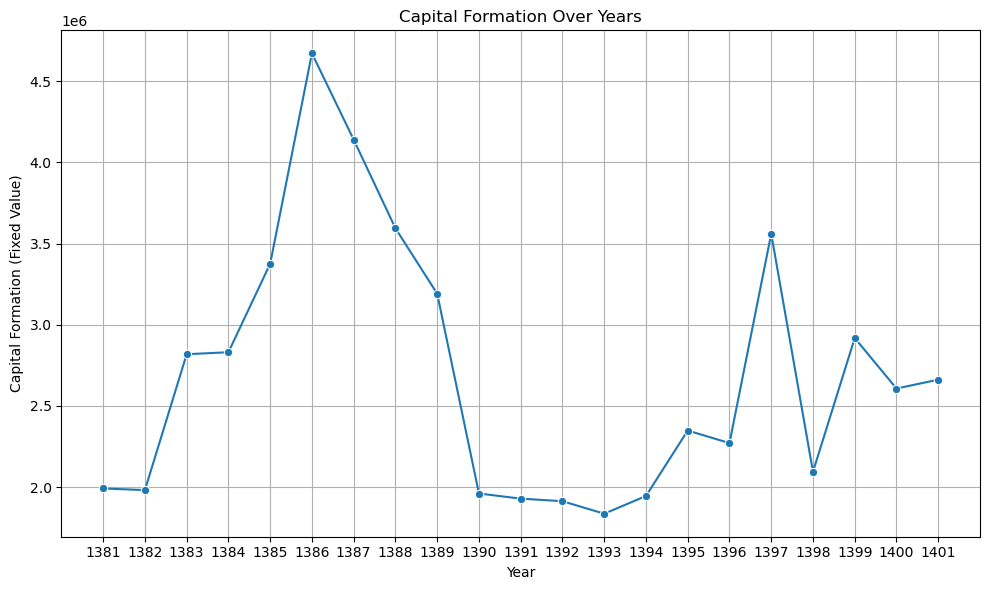

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Year is integer for clean x-axis ticks
Dataset['Year'] = Dataset['Year'].astype(int)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=Dataset, x='Year', y='Capital_Formation.Fixed.Value', marker='o')

# Set x-axis ticks to every year
plt.xticks(ticks=Dataset['Year'].unique())

plt.title('Capital Formation Over Years')
plt.xlabel('Year')
plt.ylabel('Capital Formation (Fixed Value)')
plt.grid(True)
plt.tight_layout()
plt.show()
